# Reading the Data and Overview about it

In [10]:
import numpy as np
import pandas as pd
import chardet
import csv

In [11]:
db_milesDriven =pd.read_csv(r"C:\Users\dell\Desktop\Internship_technocolabs\miles-driven.csv", sep='|')
db_milesDriven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [29]:
db_road_accidents=pd.read_csv(r"C:\Users\dell\Desktop\Internship_technocolabs\road-accidents.csv", sep = '|', comment="#")
#db_road_accidents=pd.read_csv(r"C:\Users\dell\Desktop\Internship_technocolabs\road-accidents.csv", sep = '|', skiprows = 9)
db_road_accidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


# Create a textual and a graphical summary of the data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## textual summary of data

In [25]:
db_road_accidents.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [26]:
db_milesDriven.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


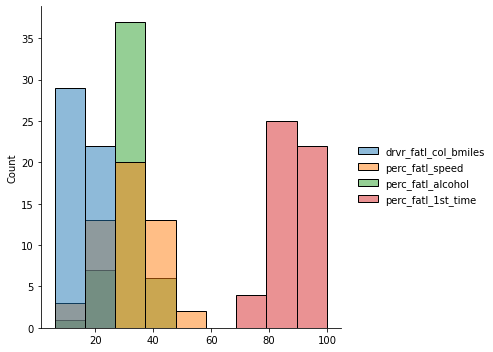

In [14]:
sns.displot(data= db_road_accidents)

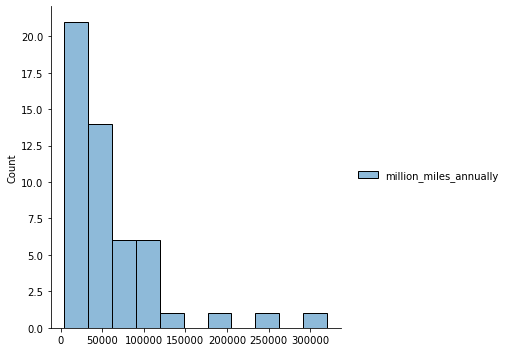

In [15]:
sns.displot(data= db_milesDriven  )

In [44]:
#sns.scatterplot(data= db_milesDriven  )

<AxesSubplot:xlabel='perc_fatl_speed', ylabel='drvr_fatl_col_bmiles'>

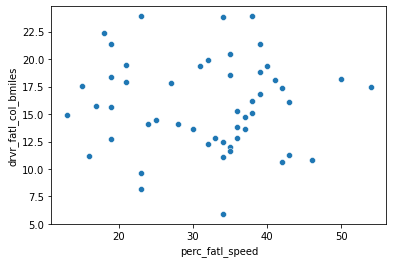

In [43]:
sns.scatterplot(x=db_road_accidents['perc_fatl_speed']  ,y =db_road_accidents['drvr_fatl_col_bmiles'])

<AxesSubplot:xlabel='perc_fatl_alcohol', ylabel='drvr_fatl_col_bmiles'>

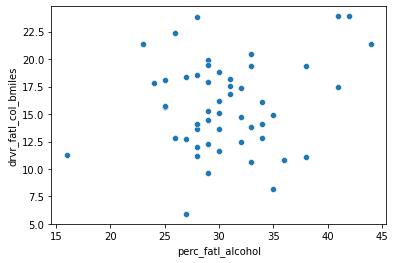

In [45]:
sns.scatterplot(x=db_road_accidents['perc_fatl_alcohol']  ,db_road_accidents['perc_fatl_alcohol'])

<AxesSubplot:xlabel='perc_fatl_alcohol', ylabel='perc_fatl_alcohol'>

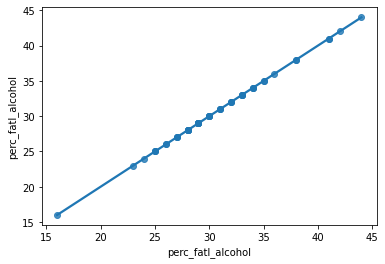

In [76]:
sns.regplot(x=db_road_accidents['perc_fatl_alcohol'],y=db_road_accidents['perc_fatl_alcohol'])

<AxesSubplot:xlabel='perc_fatl_1st_time', ylabel='drvr_fatl_col_bmiles'>

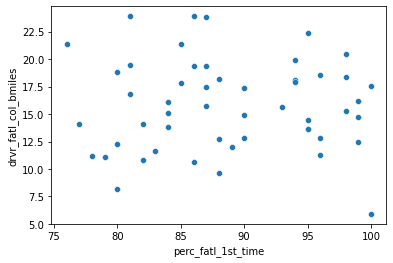

In [46]:
sns.scatterplot(x=db_road_accidents['perc_fatl_1st_time']  ,y =db_road_accidents['drvr_fatl_col_bmiles'])

<AxesSubplot:xlabel='perc_fatl_speed', ylabel='Count'>

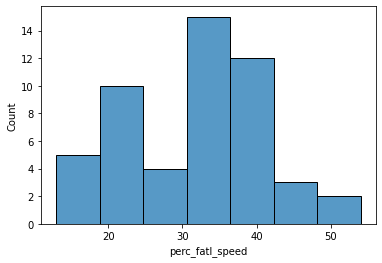

In [41]:
sns.histplot(data=db_road_accidents ,x=db_road_accidents['perc_fatl_speed'] )

<AxesSubplot:xlabel='perc_fatl_alcohol', ylabel='Count'>

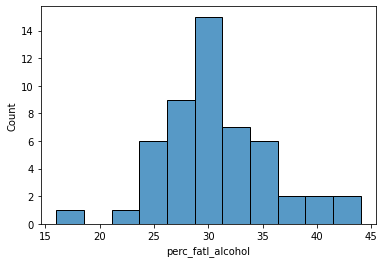

In [149]:
sns.histplot(data=db_road_accidents ,x=db_road_accidents['perc_fatl_alcohol'] )

<AxesSubplot:xlabel='perc_fatl_1st_time', ylabel='Count'>

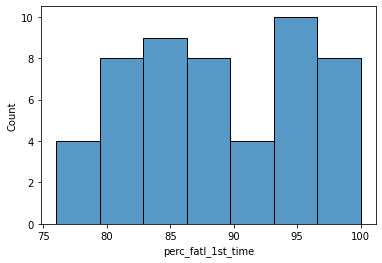

In [150]:
sns.histplot(data=db_road_accidents ,x=db_road_accidents['perc_fatl_1st_time'] )

<AxesSubplot:xlabel='drvr_fatl_col_bmiles', ylabel='Count'>

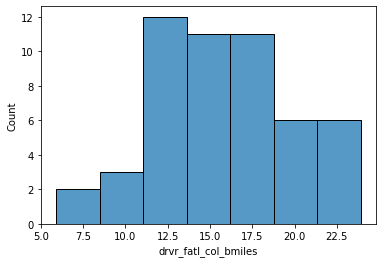

In [22]:
# sns.histplot(data=db_road_accidents ,x=db_road_accidents['drvr_fatl_col_bmiles'] )

# quantify the association

In [78]:
from numpy.random import seed
from scipy.stats import pearsonr
import numpy as np

seed(1)

In [87]:
corr_1 = np.corrcoef(db_road_accidents['perc_fatl_1st_time'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_1

array([[ 1.        , -0.01794188],
       [-0.01794188,  1.        ]])

In [88]:
corr_2 =  np.corrcoef(db_road_accidents['perc_fatl_speed'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_2

array([[ 1.        , -0.02908015],
       [-0.02908015,  1.        ]])

In [89]:
corr_3 =  np.corrcoef(db_road_accidents['perc_fatl_alcohol'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_3

array([[1.        , 0.19942634],
       [0.19942634, 1.        ]])

# fitting a mulitvarite linear regression


In [485]:
from sklearn import linear_model

In [491]:
states=pd.get_dummies(x['state'],drop_first=True)
reg = linear_model.LinearRegression()
reg.fit(db_road_accidents[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']],db_road_accidents.drvr_fatl_col_bmiles)
print(reg.coef_)

[-0.04180041  0.19086404  0.02473301]


In [489]:
x = db_road_accidents.drop(['drvr_fatl_col_bmiles'] ,axis=1)
y = db_road_accidents['drvr_fatl_col_bmiles']
x.head()

,state,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,39,30,80
1,Alaska,41,25,94
2,Arizona,35,28,96
3,Arkansas,18,26,95
4,California,35,28,89


In [474]:
import pandas as pd

In [475]:
states=pd.get_dummies(x['state'],drop_first=True)
x= x.drop(labels=['state'],axis=1)
x=pd.concat([x,states],axis=1)


In [476]:
x.head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,39,30,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41,25,94,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,28,96,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,26,95,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,28,89,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [478]:
from sklearn.linear_model import LinearRegression
mL= LinearRegression()
mL.fit(X_train,y_train)


LinearRegression()

In [479]:
y_pred = mL.predict(X_test)

In [480]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-0.4413342778881739


In [481]:
mL.coef_

array([ 5.57496584e-02, -1.01195733e-01, -2.04890134e-01,  1.55098390e+00,
        1.77635684e-15,  7.43931191e+00,  7.13578502e-15, -2.21754014e+00,
       -7.37329294e+00, -2.48689958e-14, -8.82703622e+00,  2.87076000e+00,
       -1.33226763e-15, -7.43849426e-15,  2.54075657e-01, -2.14972595e+00,
       -5.47348502e-01, -9.45255239e-01,  8.62721761e-02,  2.18706250e+00,
        5.91460825e+00, -2.82468980e+00, -1.92594769e+00, -9.20202680e+00,
       -2.77555756e-16, -6.77008012e+00,  4.33699022e+00, -1.69865517e+00,
       -1.33226763e-15, -8.88178420e-16, -1.77635684e-15,  0.00000000e+00,
       -6.92992959e+00,  4.09942839e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.25751375e+00, -4.02138364e+00,
        5.27070563e-01, -6.81657598e+00,  6.47379285e+00,  0.00000000e+00,
        1.80718825e+00,  2.78804714e+00, -5.86149674e+00,  0.00000000e+00,
       -3.64947296e+00, -6.83432097e+00,  6.51058777e+00, -3.70960329e+00,
        6.84043832e-01])